In [1]:
import sys
import os
import matplotlib
import matplotlib.pyplot as plt


sys.path.append(r"C:\Users\pgrover\Documents\code\pymorph")
import weno_morph_model as wmm
import numpy as np
from scipy.signal import savgol_filter
import sediment_transport.sed_trans as st
%load_ext cython
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import schemes.weno as weno

a = np.array([11,12,13,14,15,16,17,18])

i = 2
loc = weno.get_stencil(a, i-2, i+1)

loc

array([11, 12, 13])

['ncols', '1']
['nrows', '194']
['xllcorner', '0']
['yllcorner', '0']
['cellsize', '0.002']
['NODATA_value', '-9999']


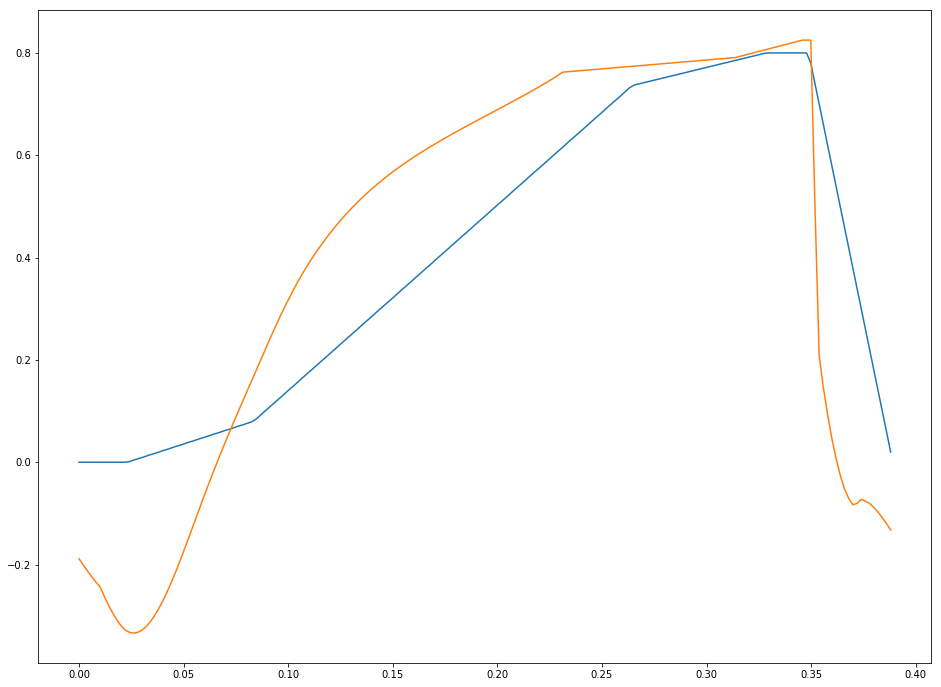

In [85]:
# Setting paths

casefolder = r'c:\Users\pgrover\Dropbox\PhD\Papers\Paper 1 - Application of OpenFoam to simulate the flow over fixed dunes\geometry'


bed_filepath = os.path.join(casefolder, 'modified_flume_profile_plus0.05_v001.txt')
zbed, xc, dx = wmm.load_bed_profile(bed_filepath)


bed_shear_filepath = os.path.join(casefolder,'12cm', 'kwsst_shear_modified.txt')
bed_shear_stress = wmm.load_bed_shear_stress(bed_shear_filepath)

#bed_shear_stress = savgol_filter(bed_shear_stress, 5,2)

plt.figure(figsize=[16,12])
plt.plot(xc, zbed*40.)
plt.plot(xc, bed_shear_stress)
#plt.xlim([0.3,0.4])

 Starting simulation....
Number of time steps: 30
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.825
qbedload shape: (194,)
Max qbedload = 4.685054194993482e-06
 Done
 ----------------------------


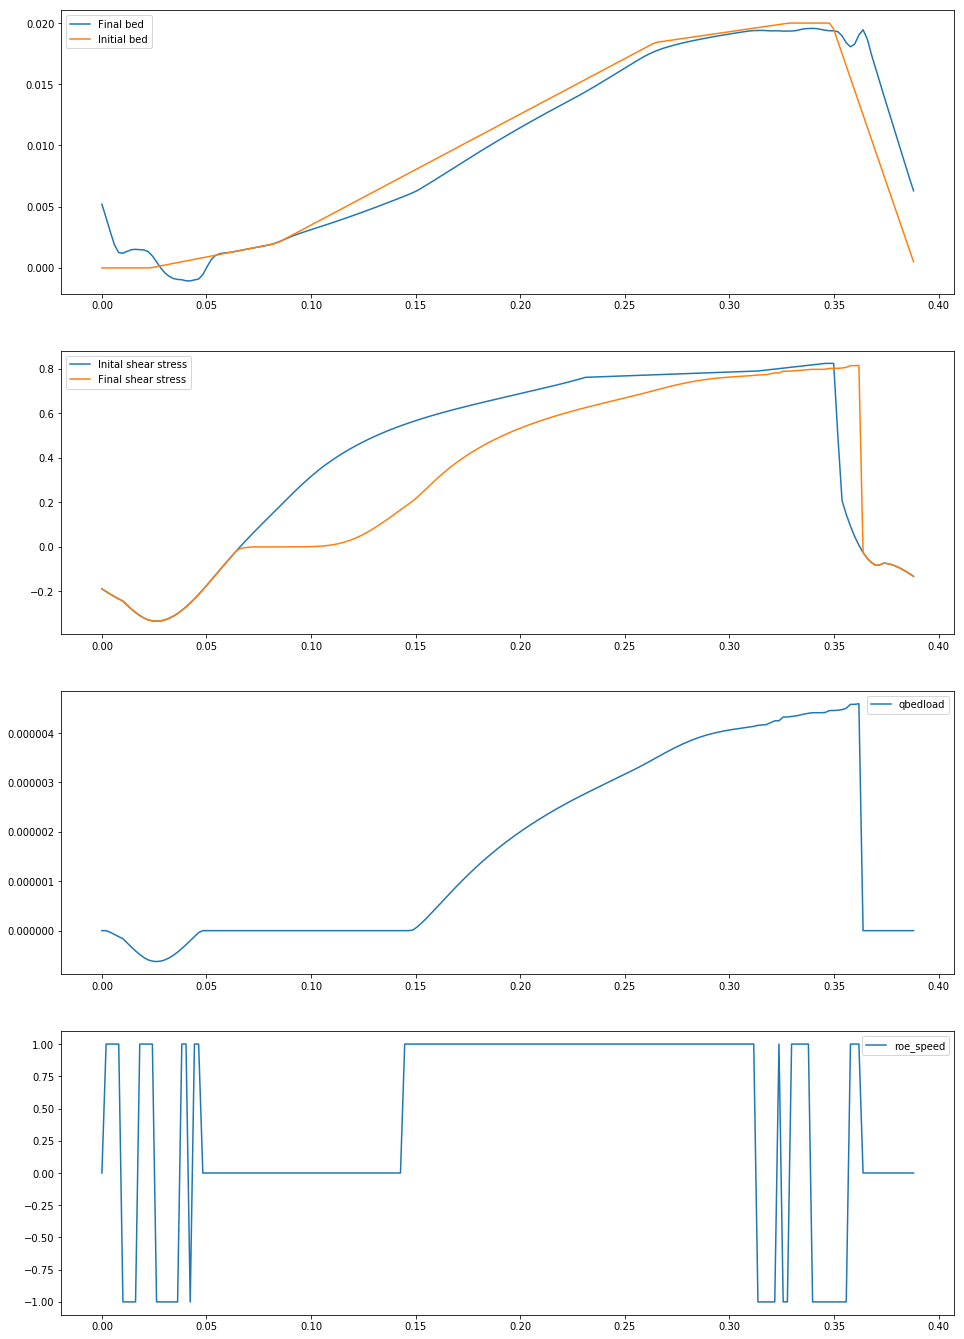

In [86]:
D50 = 0.25/1000.

model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress, zbed, xc, dx,useSmoother=True)
simulationTime = 30
dt = 1

zc_kwsst_12cm, qbedload, bedShear, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
axs[0].plot(xc, zc_kwsst_12cm, label='Final bed')
axs[0].plot(xc, zbed, label='Initial bed')
axs[0].legend()

axs[1].plot(xc, bed_shear_stress, label='Inital shear stress')
axs[1].plot(xc, bedShear, label='Final shear stress')
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, roe_speed, label='roe_speed')
axs[3].legend()

## 6 cm Flow Case

Note that in this case the shear profile is not set correctly and is not offset

['ncols', '1']
['nrows', '194']
['xllcorner', '0']
['yllcorner', '0']
['cellsize', '0.002']
['NODATA_value', '-9999']


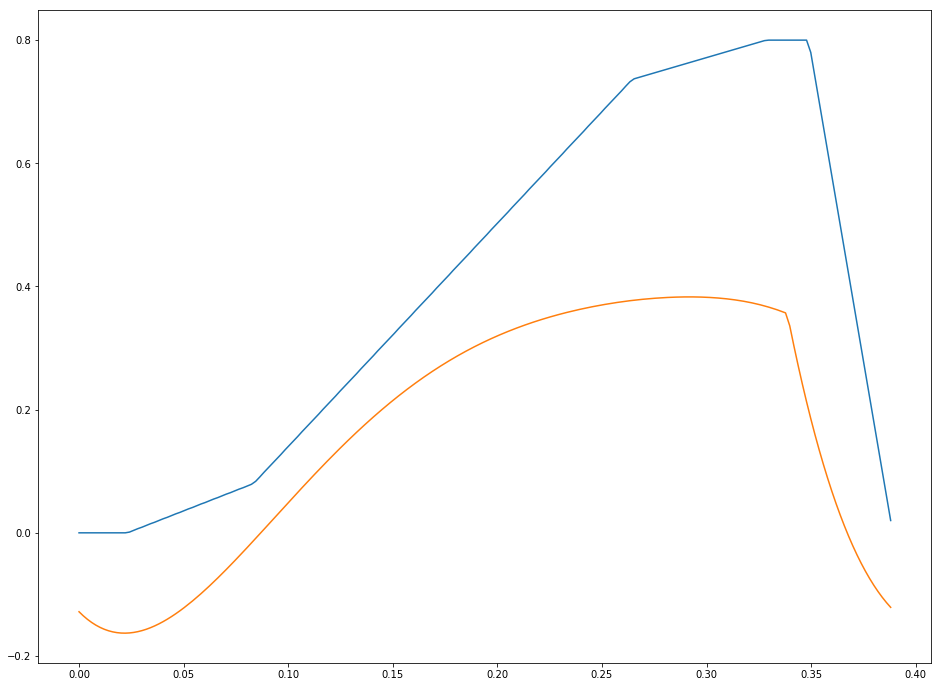

In [69]:
casefolder = r'c:\Users\pgrover\Dropbox\PhD\Papers\Paper 1 - Application of OpenFoam to simulate the flow over fixed dunes\geometry'


bed_filepath = os.path.join(casefolder, 'modified_flume_profile_plus0.05_v001.txt')
zbed, xc, dx = wmm.load_bed_profile(bed_filepath)


bed_shear_filepath = os.path.join(casefolder,'6cm', 'kwsst_shear.txt')
bed_shear_stress_6cm = wmm.load_bed_shear_stress(bed_shear_filepath)

#bed_shear_stress = savgol_filter(bed_shear_stress, 5,2)

plt.figure(figsize=[16,12])
plt.plot(xc, zbed*40.)
plt.plot(xc, bed_shear_stress_6cm)
#plt.xlim([0.3,0.4])

 Starting simulation....
Number of time steps: 20
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.383065899
qbedload shape: (194,)
Max qbedload = 9.213835802087987e-07
 Done
 ----------------------------


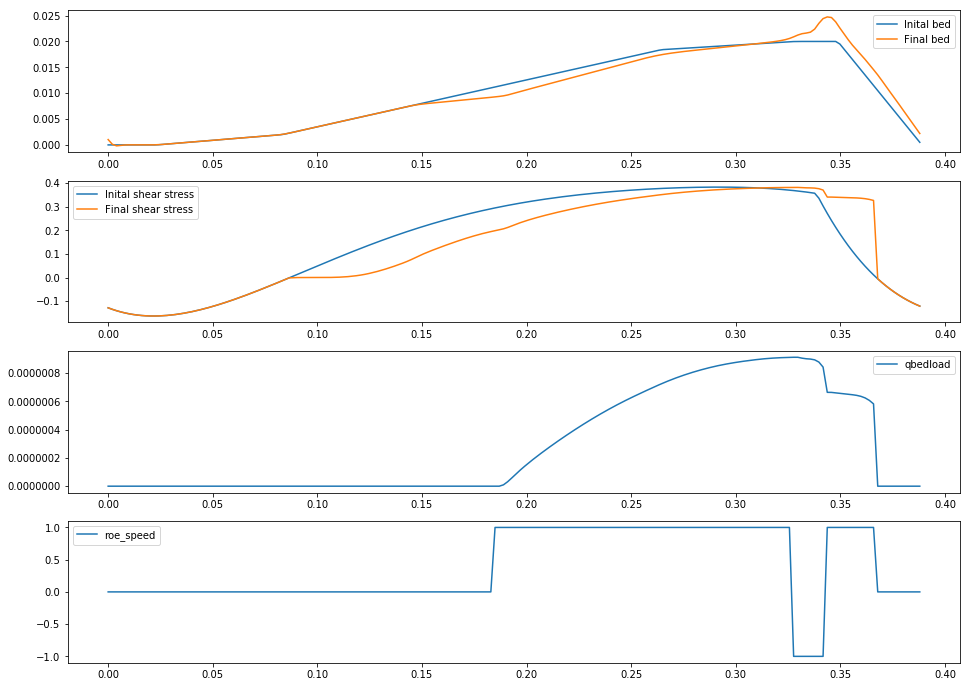

In [75]:
model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress_6cm, zbed, xc, dx,useSmoother=True,adjustment_angle=20.)
simulationTime = 120
dt = 6

zc_kwsst_6cm, qbedload, final_bed_shear_stress_6cm, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,12])
axs[0].plot(xc, zbed, label='Inital bed')
axs[0].plot(xc, zc_kwsst_6cm, label='Final bed')
axs[0].legend()

axs[1].plot(xc, bed_shear_stress_6cm, label='Inital shear stress')
axs[1].plot(xc, final_bed_shear_stress_6cm, label='Final shear stress')
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, roe_speed, label='roe_speed')
axs[3].legend()

 Starting simulation....
Number of time steps: 2
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.383065899
qbedload shape: (194,)
Max qbedload = 9.213835802087987e-07
 Done
 ----------------------------


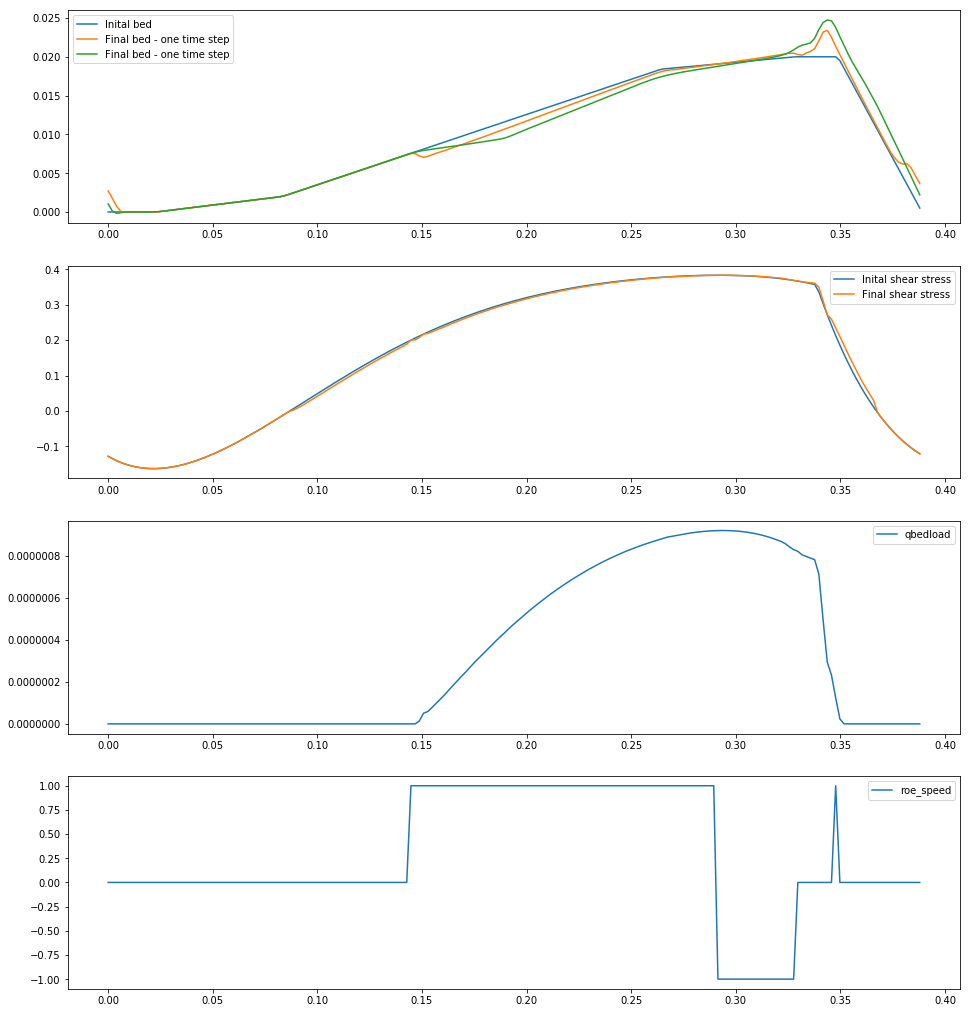

In [78]:
model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress_6cm, zbed, xc, dx,useSmoother=True,adjustment_angle=20.)
simulationTime = 120
dt = 60

zc_kwsst_6cm_1dt, qbedload, final_bed_shear_stress_6cm, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,18])
axs[0].plot(xc, zbed, label='Inital bed')
axs[0].plot(xc, zc_kwsst_6cm_1dt, label='Final bed - one time step')
axs[0].plot(xc, zc_kwsst_6cm, label='Final bed - one time step')
axs[0].legend()

axs[1].plot(xc, bed_shear_stress_6cm, label='Inital shear stress')
axs[1].plot(xc, final_bed_shear_stress_6cm, label='Final shear stress')
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, roe_speed, label='roe_speed')
axs[3].legend()

['ncols', '1']
['nrows', '194']
['xllcorner', '0']
['yllcorner', '0']
['cellsize', '0.002']
['NODATA_value', '-9999']


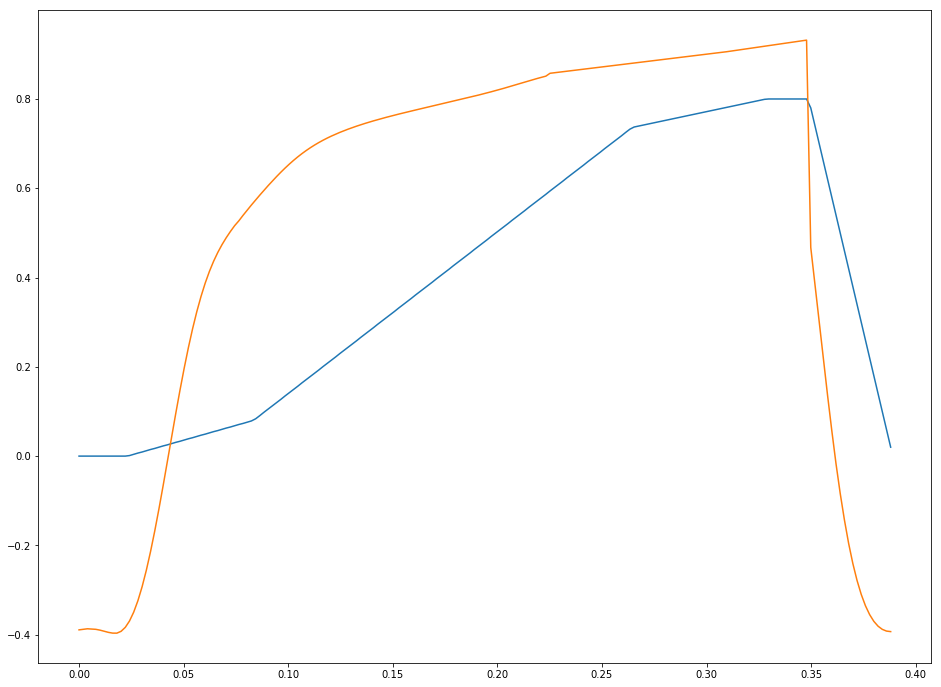

In [81]:


casefolder = r'c:\Users\pgrover\Dropbox\PhD\Papers\Paper 1 - Application of OpenFoam to simulate the flow over fixed dunes\geometry'


bed_filepath = os.path.join(casefolder, 'modified_flume_profile_plus0.05_v001.txt')
zbed, xc, dx = wmm.load_bed_profile(bed_filepath)


bed_shear_filepath = os.path.join(casefolder,'12cm', 'ke_shear.txt')
bed_shear_stress_6cm = wmm.load_bed_shear_stress(bed_shear_filepath)

#bed_shear_stress = savgol_filter(bed_shear_stress, 5,2)

plt.figure(figsize=[16,12])
plt.plot(xc, zbed*40.)
plt.plot(xc, bed_shear_stress_6cm)

 Starting simulation....
Number of time steps: 30
Grid dx = 0.002
Grid nx = 194
D50:    0.00025
Rho Particle:    2650.0
Angle Repose Degrees:    30.0
Max Shear Stress:    0.931827975
qbedload shape: (194,)
Max qbedload = 5.835380379833412e-06
 Done
 ----------------------------


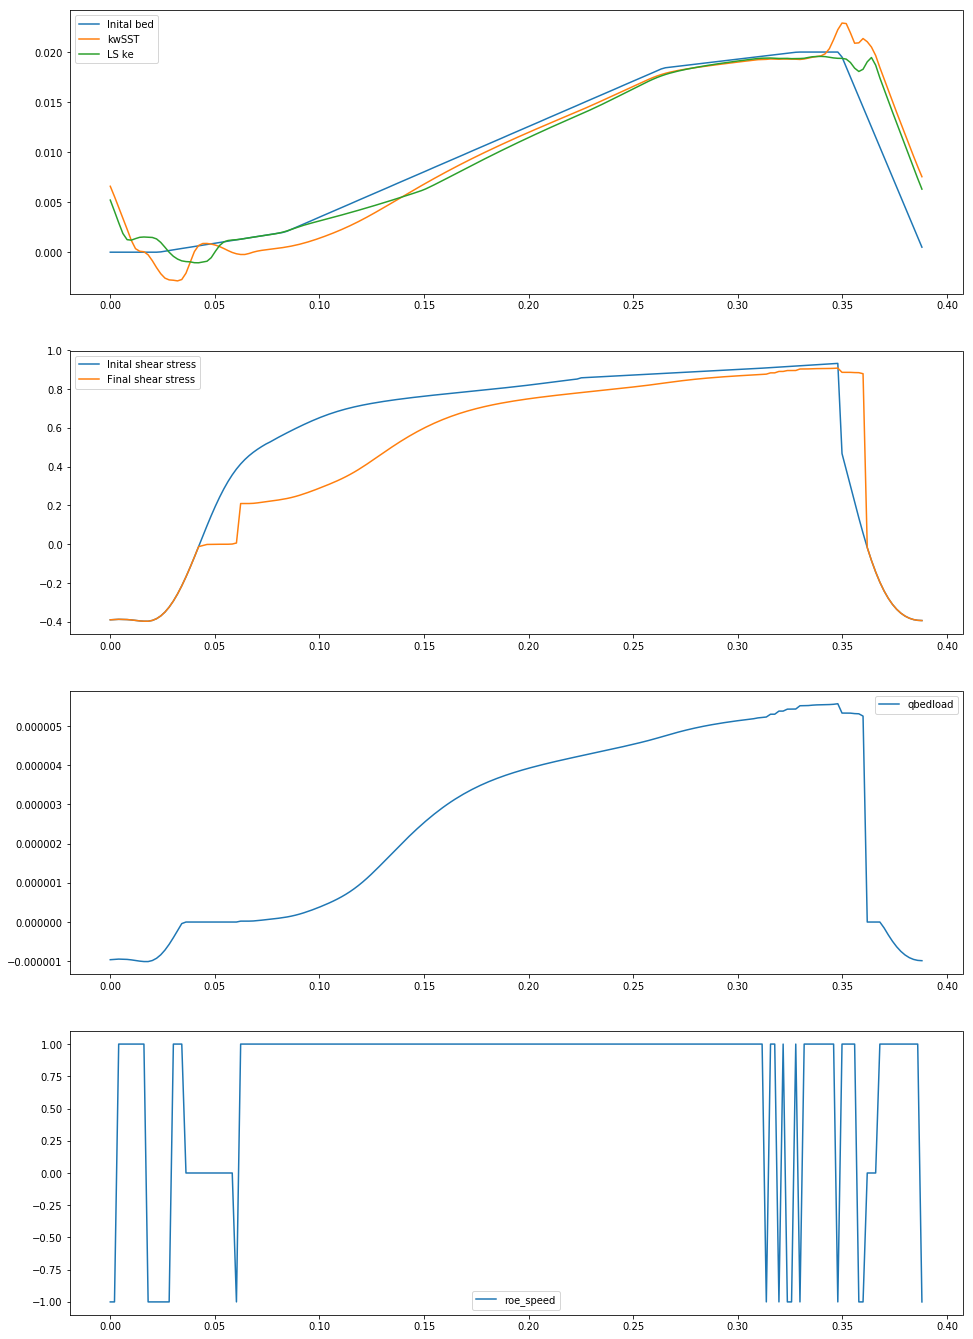

In [88]:
model = wmm.UpwindMorphologicalModel(D50)
model.setup_model(bed_shear_stress_6cm, zbed, xc, dx,useSmoother=True,adjustment_angle=28.)
simulationTime = 30
dt = 1

zc_ke_12cm, qbedload, final_bed_shear_stress_6cm, roe_speed = model.run_model(simulationTime, 
                                                             dt=dt, 
                                                             useSlopeAdjust=False)

fig, axs = plt.subplots(4,1, figsize=[16,24])
axs[0].plot(xc, zbed, label='Inital bed')
axs[0].plot(xc, zc_ke_12cm, label='kwSST')
axs[0].plot(xc, zc_kwsst_12cm, label='LS ke')
axs[0].legend()

axs[1].plot(xc, bed_shear_stress_6cm, label='Inital shear stress')
axs[1].plot(xc, final_bed_shear_stress_6cm, label='Final shear stress')
axs[1].legend()

axs[2].plot(xc, qbedload, label='qbedload')
axs[2].legend()

axs[3].plot(xc, roe_speed, label='roe_speed')
axs[3].legend()